## Sự thay đổi của lượt tương tác của từng bài viết theo ngày

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
analyze_df = pd.read_csv('reactions_data.csv')

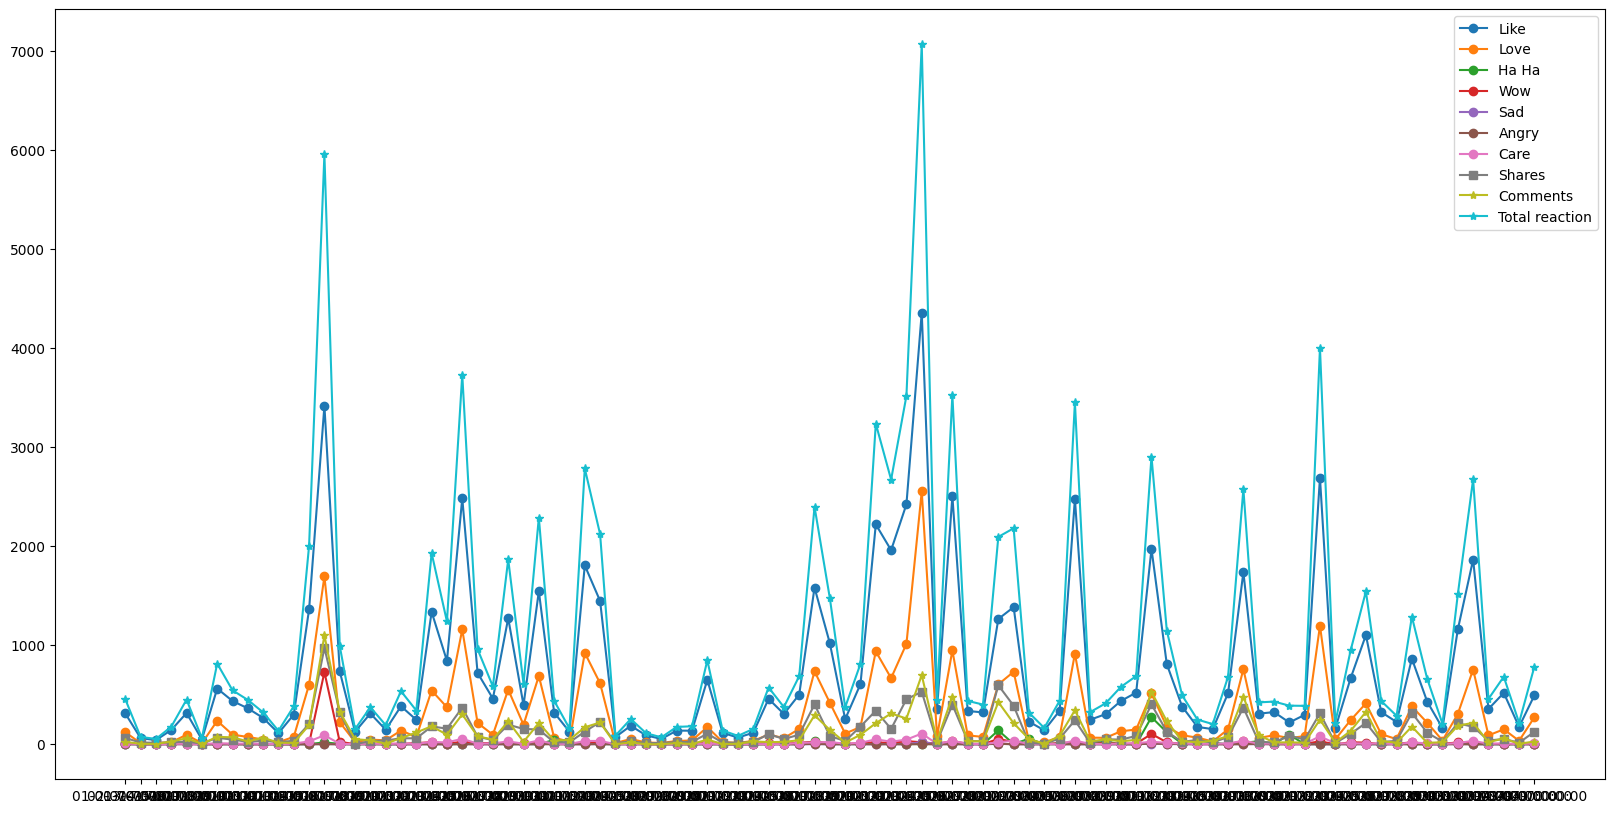

In [4]:

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(analyze_df['time'], analyze_df['like'], label = "Like", marker="o")
ax.plot(analyze_df['time'], analyze_df['love'], label = "Love", marker="o")
ax.plot(analyze_df['time'], analyze_df['haha'], label = "Ha Ha", marker="o")
ax.plot(analyze_df['time'], analyze_df['wow'], label = "Wow", marker="o")
ax.plot(analyze_df['time'], analyze_df['sad'], label = "Sad", marker="o")
ax.plot(analyze_df['time'], analyze_df['angry'], label = "Angry", marker="o")
ax.plot(analyze_df['time'], analyze_df['care'], label = "Care", marker="o")
ax.plot(analyze_df['time'], analyze_df['shares'], label = "Shares", marker="s")
ax.plot(analyze_df['time'], analyze_df['comments'], label = "Comments", marker="*")
ax.plot(analyze_df['time'], analyze_df['reaction_count'], label = "Total reaction", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

## Bài viết có lượt tương tác lớn nhất trong bộ dữ liệu

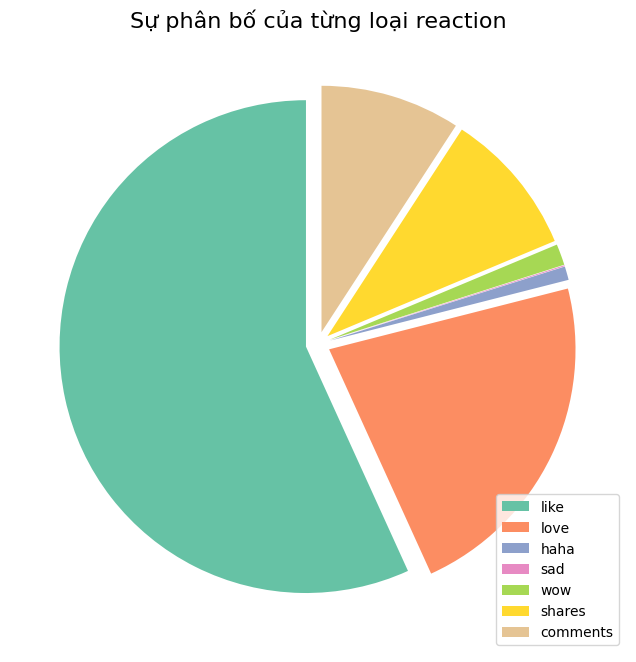

In [5]:
reaction_total = pd.read_csv('reactions_data.csv')
keys = ['like', 'love', 'haha', 'sad', 'wow','shares','comments']
values = [reaction_total[key].sum() for key in keys]

colors = plt.cm.Set2(range(len(keys)))

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05]

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(values, labels=None, autopct='', startangle=90, colors=colors, explode=explode)

plt.legend(patches, keys, loc='best')
for text, autotext, color in zip(texts, autotexts, colors):
    text.set_color(color)
    autotext.set_color('white') 

plt.title('Sự phân bố của từng loại reaction', fontsize=16)

plt.show()



10 bài viết có lượng tương tác cao nhất

In [6]:
reaction_total['total_reactions'] = reaction_total['reaction_count'] + reaction_total['comments']
top10_posts = reaction_total.nlargest(20, 'total_reactions')[['post_text', 'comments', 'reaction_count']]

top10_posts

,post_text,comments,reaction_count
52,The Mario Kart 8 Deluxe - Booster Course Pass ...,698,7068
13,Adventure calls in the galaxy of Jet Force Gem...,1100,5957
78,"With overhauled graphics and new cutscenes, th...",249,4002
22,Wa-hoo! Super Mario RPG is out now!,302,3732
54,Wave 6 of the Mario Kart 8 Deluxe – Booster Co...,482,3525
62,Time to take the scenic route! Gear up to crui...,344,3454
51,Bwa ha ha! Only 1 week until Super Mario RPG c...,260,3518
49,Sweet! Super Mario RPG is coming to Nintendo S...,213,3237
67,The Nintendo Switch – OLED Model system + Supe...,530,2905
73,Buckle up! Four new characters race onto the s...,477,2578


## Tương quan của các lượt reactions so với các trường khác

### Trường shares

In [7]:
print(analyze_df[['like','love','haha','wow','sad','angry','care']].corrwith(analyze_df['shares']))

like     0.845705
love     0.832125
haha     0.288043
wow      0.662181
sad      0.432887
angry    0.408918
care     0.805976
dtype: float64


### Trường comment

In [8]:
print(analyze_df[['like','love','haha','wow','sad','angry','care']].corrwith(analyze_df['comments']))

like     0.869699
love     0.843351
haha     0.319457
wow      0.699788
sad      0.524623
angry    0.433335
care     0.811622
dtype: float64


## Thời gian đăng bài phổ biến

/tmp/ipykernel_3455/4212828612.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, order=sorted(counts.index), palette=colors)


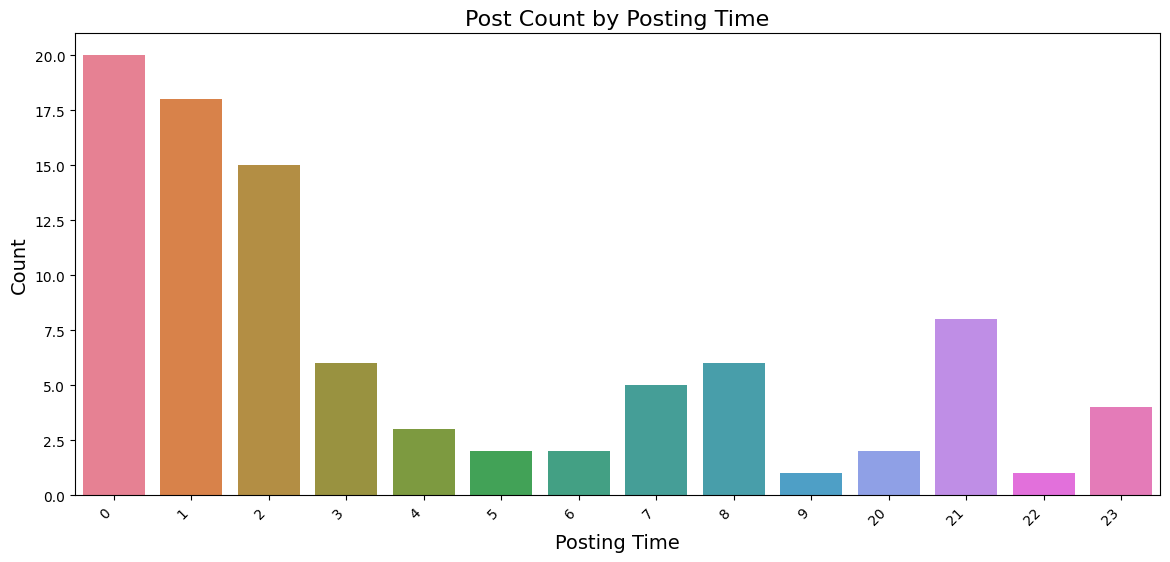

In [9]:

counts = analyze_df['hour'].value_counts()

colors = sns.color_palette("husl", n_colors=len(counts))

plt.figure(figsize=(14, 6))
sns.barplot(x=counts.index, y=counts.values, order=sorted(counts.index), palette=colors)

plt.title('Post Count by Posting Time', fontsize=16)
plt.xlabel('Posting Time', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()

Giờ đăng bài phổ biến

/tmp/ipykernel_3455/18953711.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)
/tmp/ipykernel_3455/18953711.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)


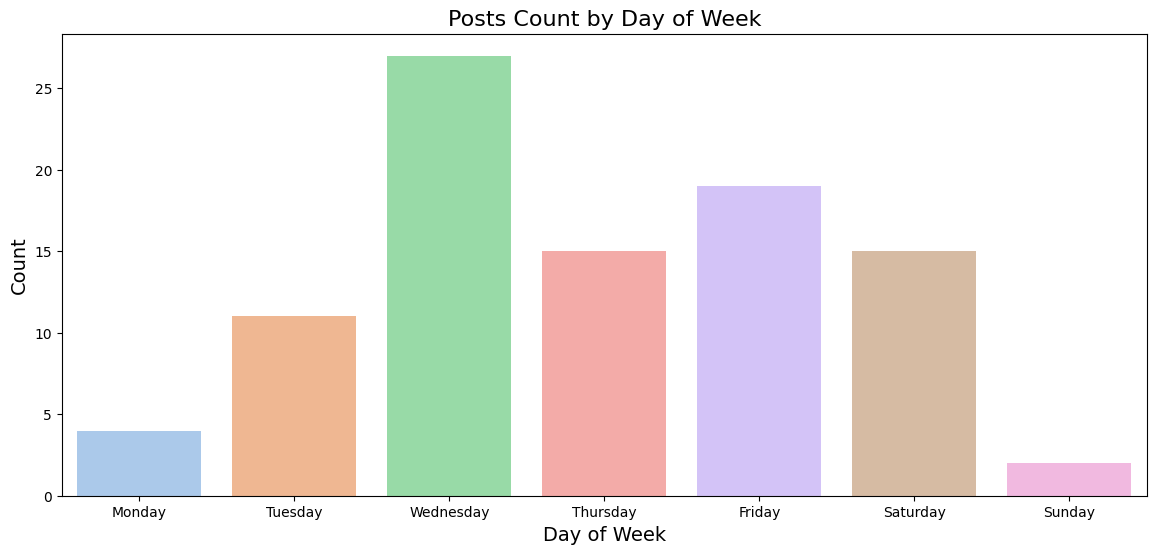

In [10]:
counts = analyze_df['Day'].value_counts()

colors = sns.color_palette("pastel")

plt.figure(figsize=(14, 6))
sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)

plt.title('Posts Count by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

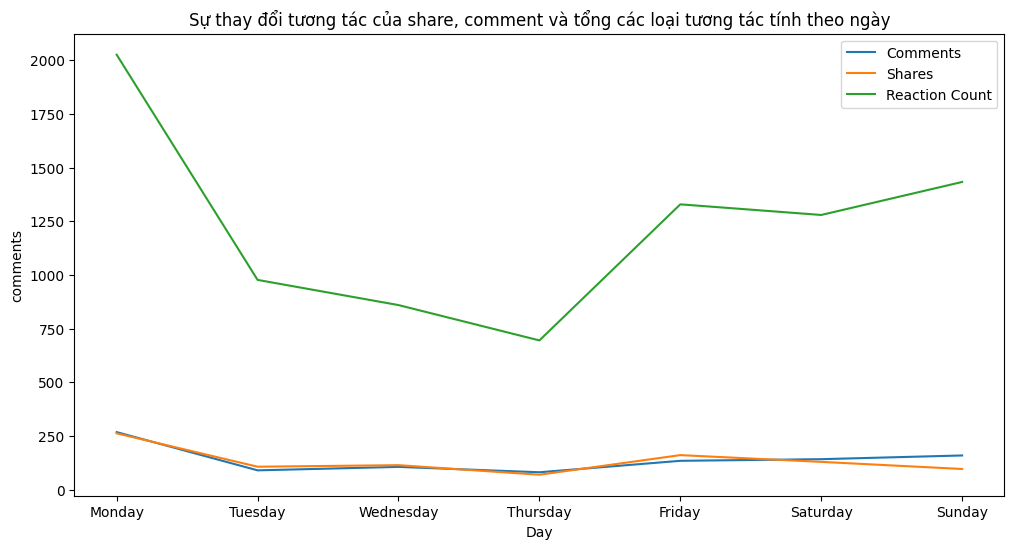

In [11]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
analyze_df['Day'] = pd.Categorical(analyze_df['Day'], categories=day_order, ordered=True)

plt.figure(figsize=(12, 6))

sns.lineplot(data=analyze_df, x="Day", y="comments", err_style=None, hue_order=day_order, label='Comments')
sns.lineplot(data=analyze_df, x="Day", y="shares", err_style=None, hue_order=day_order, label='Shares')
sns.lineplot(data=analyze_df, x="Day", y="reaction_count", err_style=None, hue_order=day_order, label='Reaction Count')

plt.title('Sự thay đổi tương tác của share, comment và tổng các loại tương tác tính theo ngày')
plt.legend()
plt.show()

## Tìm từ khóa của các posts của Nintendo Switch

In [12]:
df_text = analyze_df[['post_id','post_text']]
text    = str(df_text['post_text'])

In [16]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 9.3 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


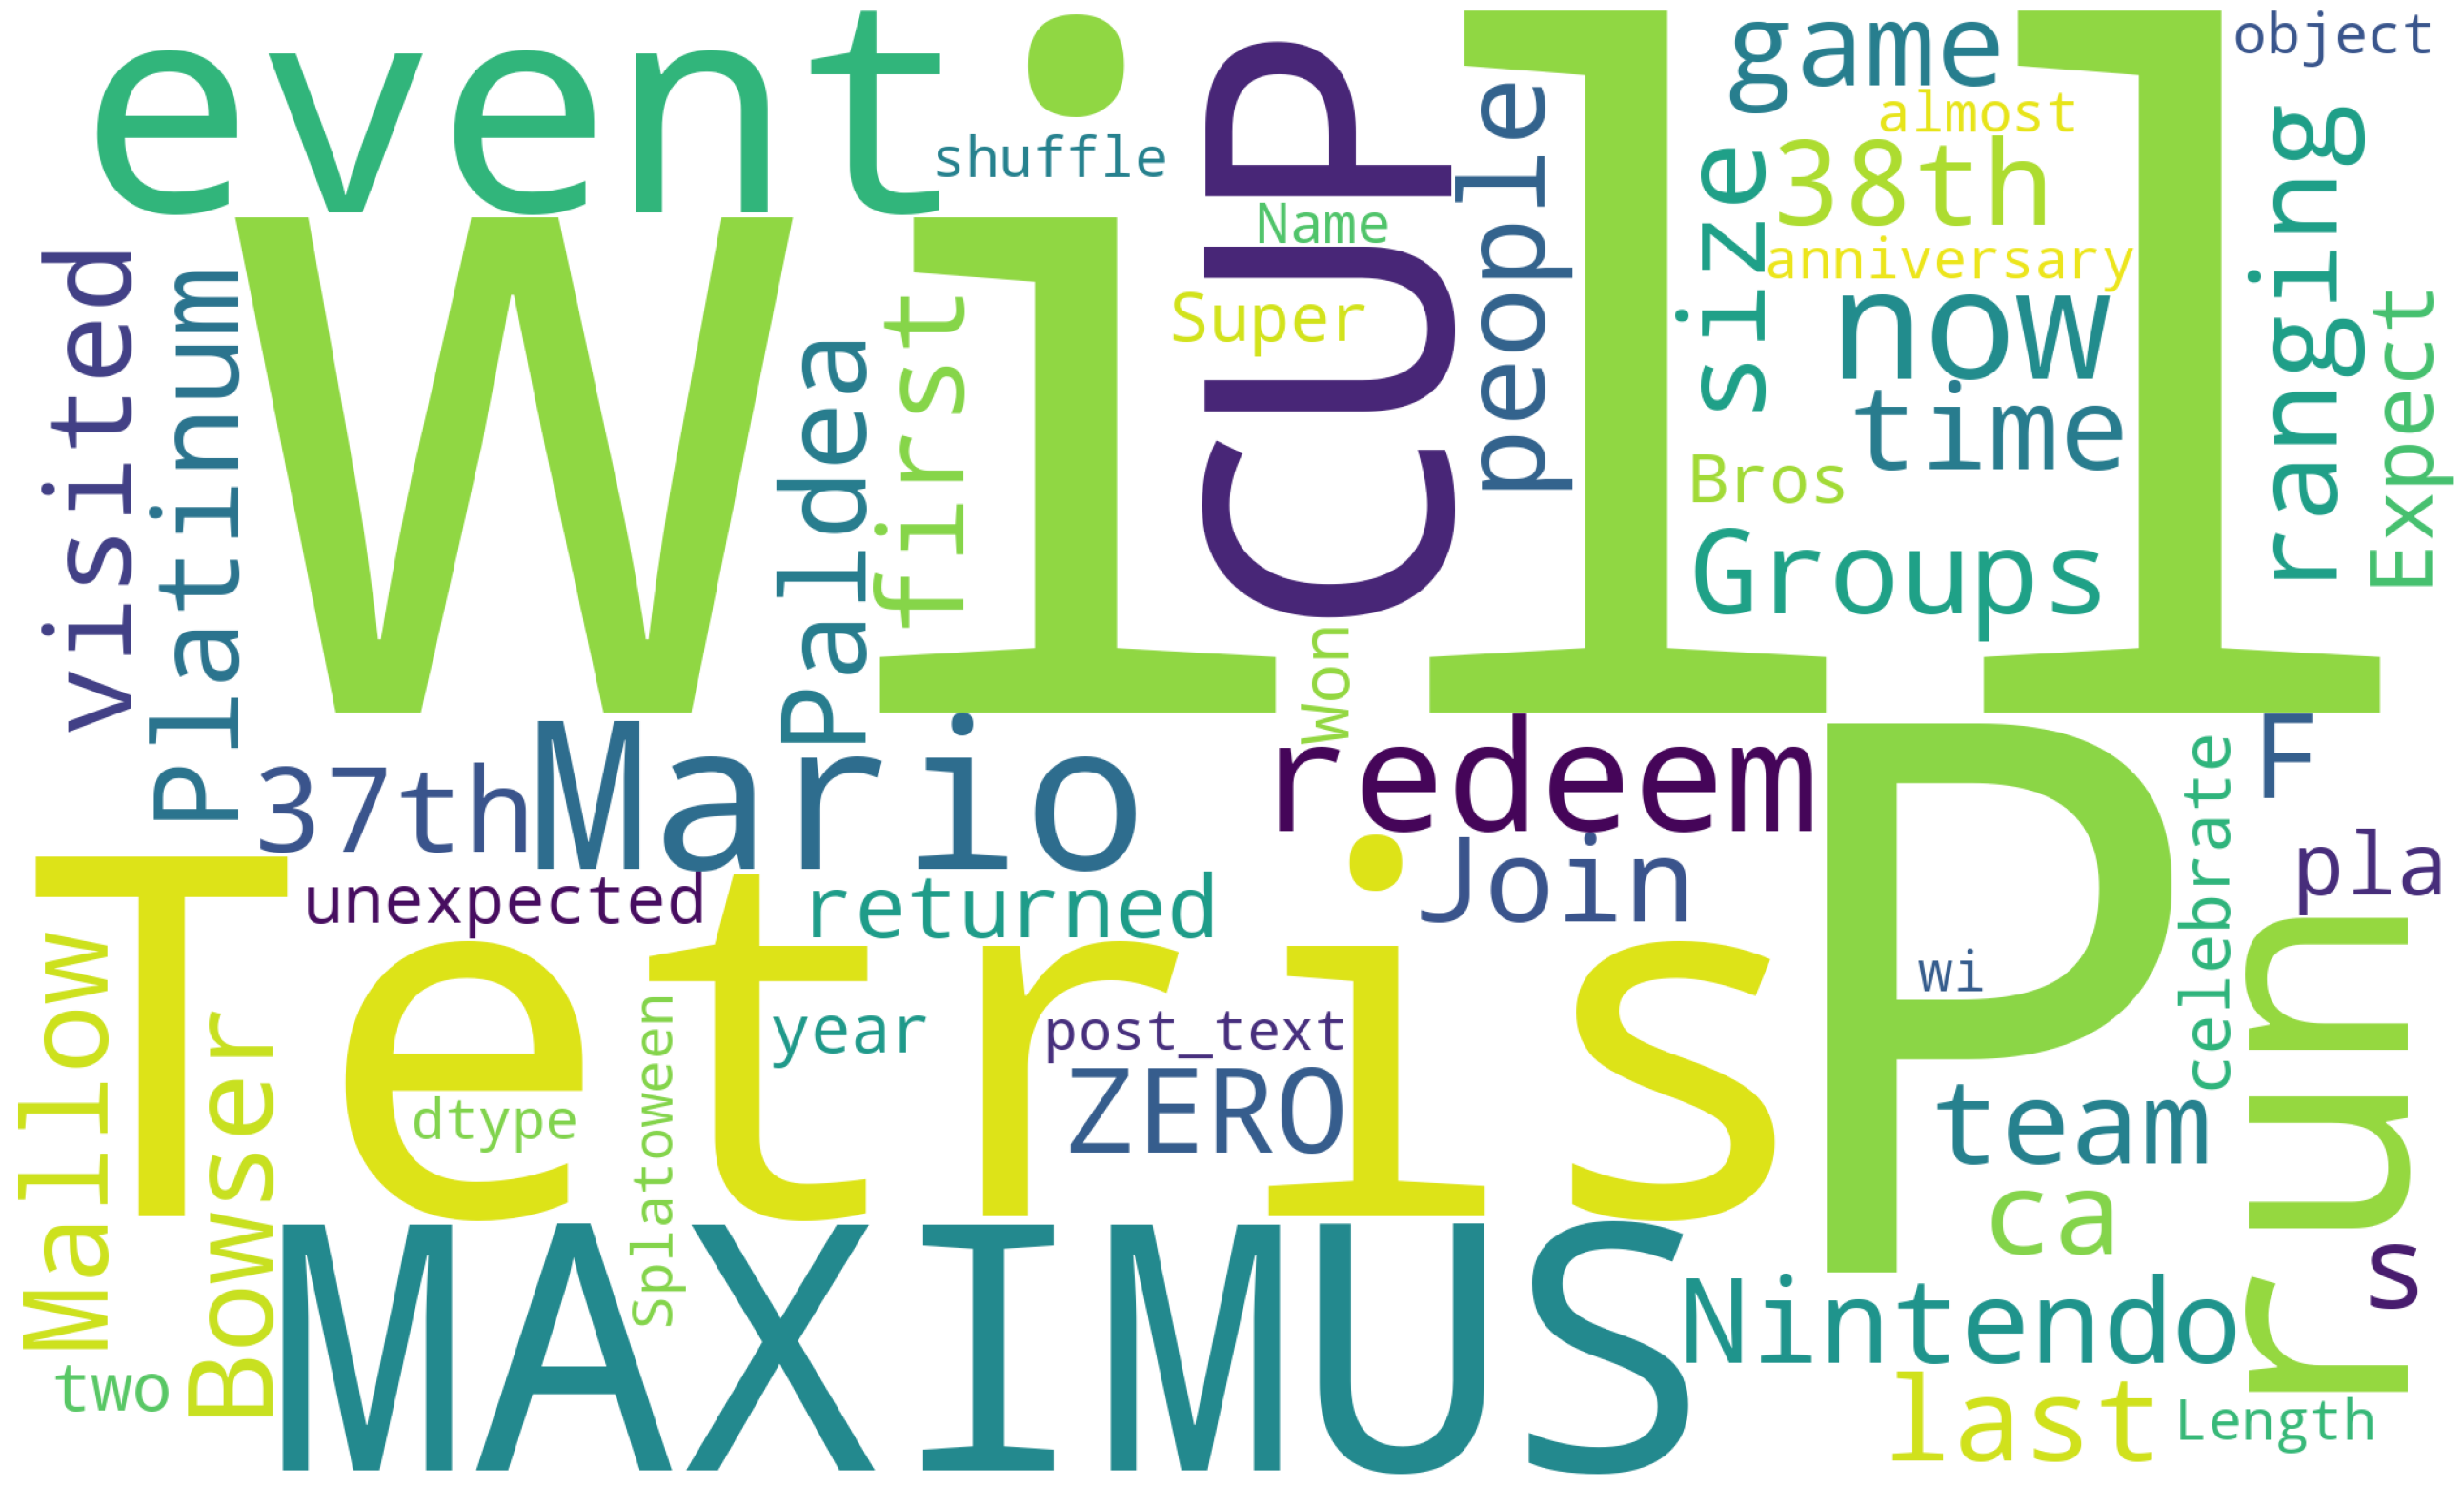

In [17]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Phân tích comments

In [18]:
path = 'Data/NintendoSwitch.npy'
post_list = np.load(path, allow_pickle = True)

In [19]:
post_list=post_list.tolist()

In [21]:
res=[]
for post in post_list:
    if len(post['comments_full']) > 0:
      cmt = '\n'.join([comment['comment_text'] for comment in post['comments_full'] ])
      res.append(cmt)

In [22]:
text=""
for i in res:
  text=text+i+" . "

In [23]:
%pip install -U nltk
%pip install rake-nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 971.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 16.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

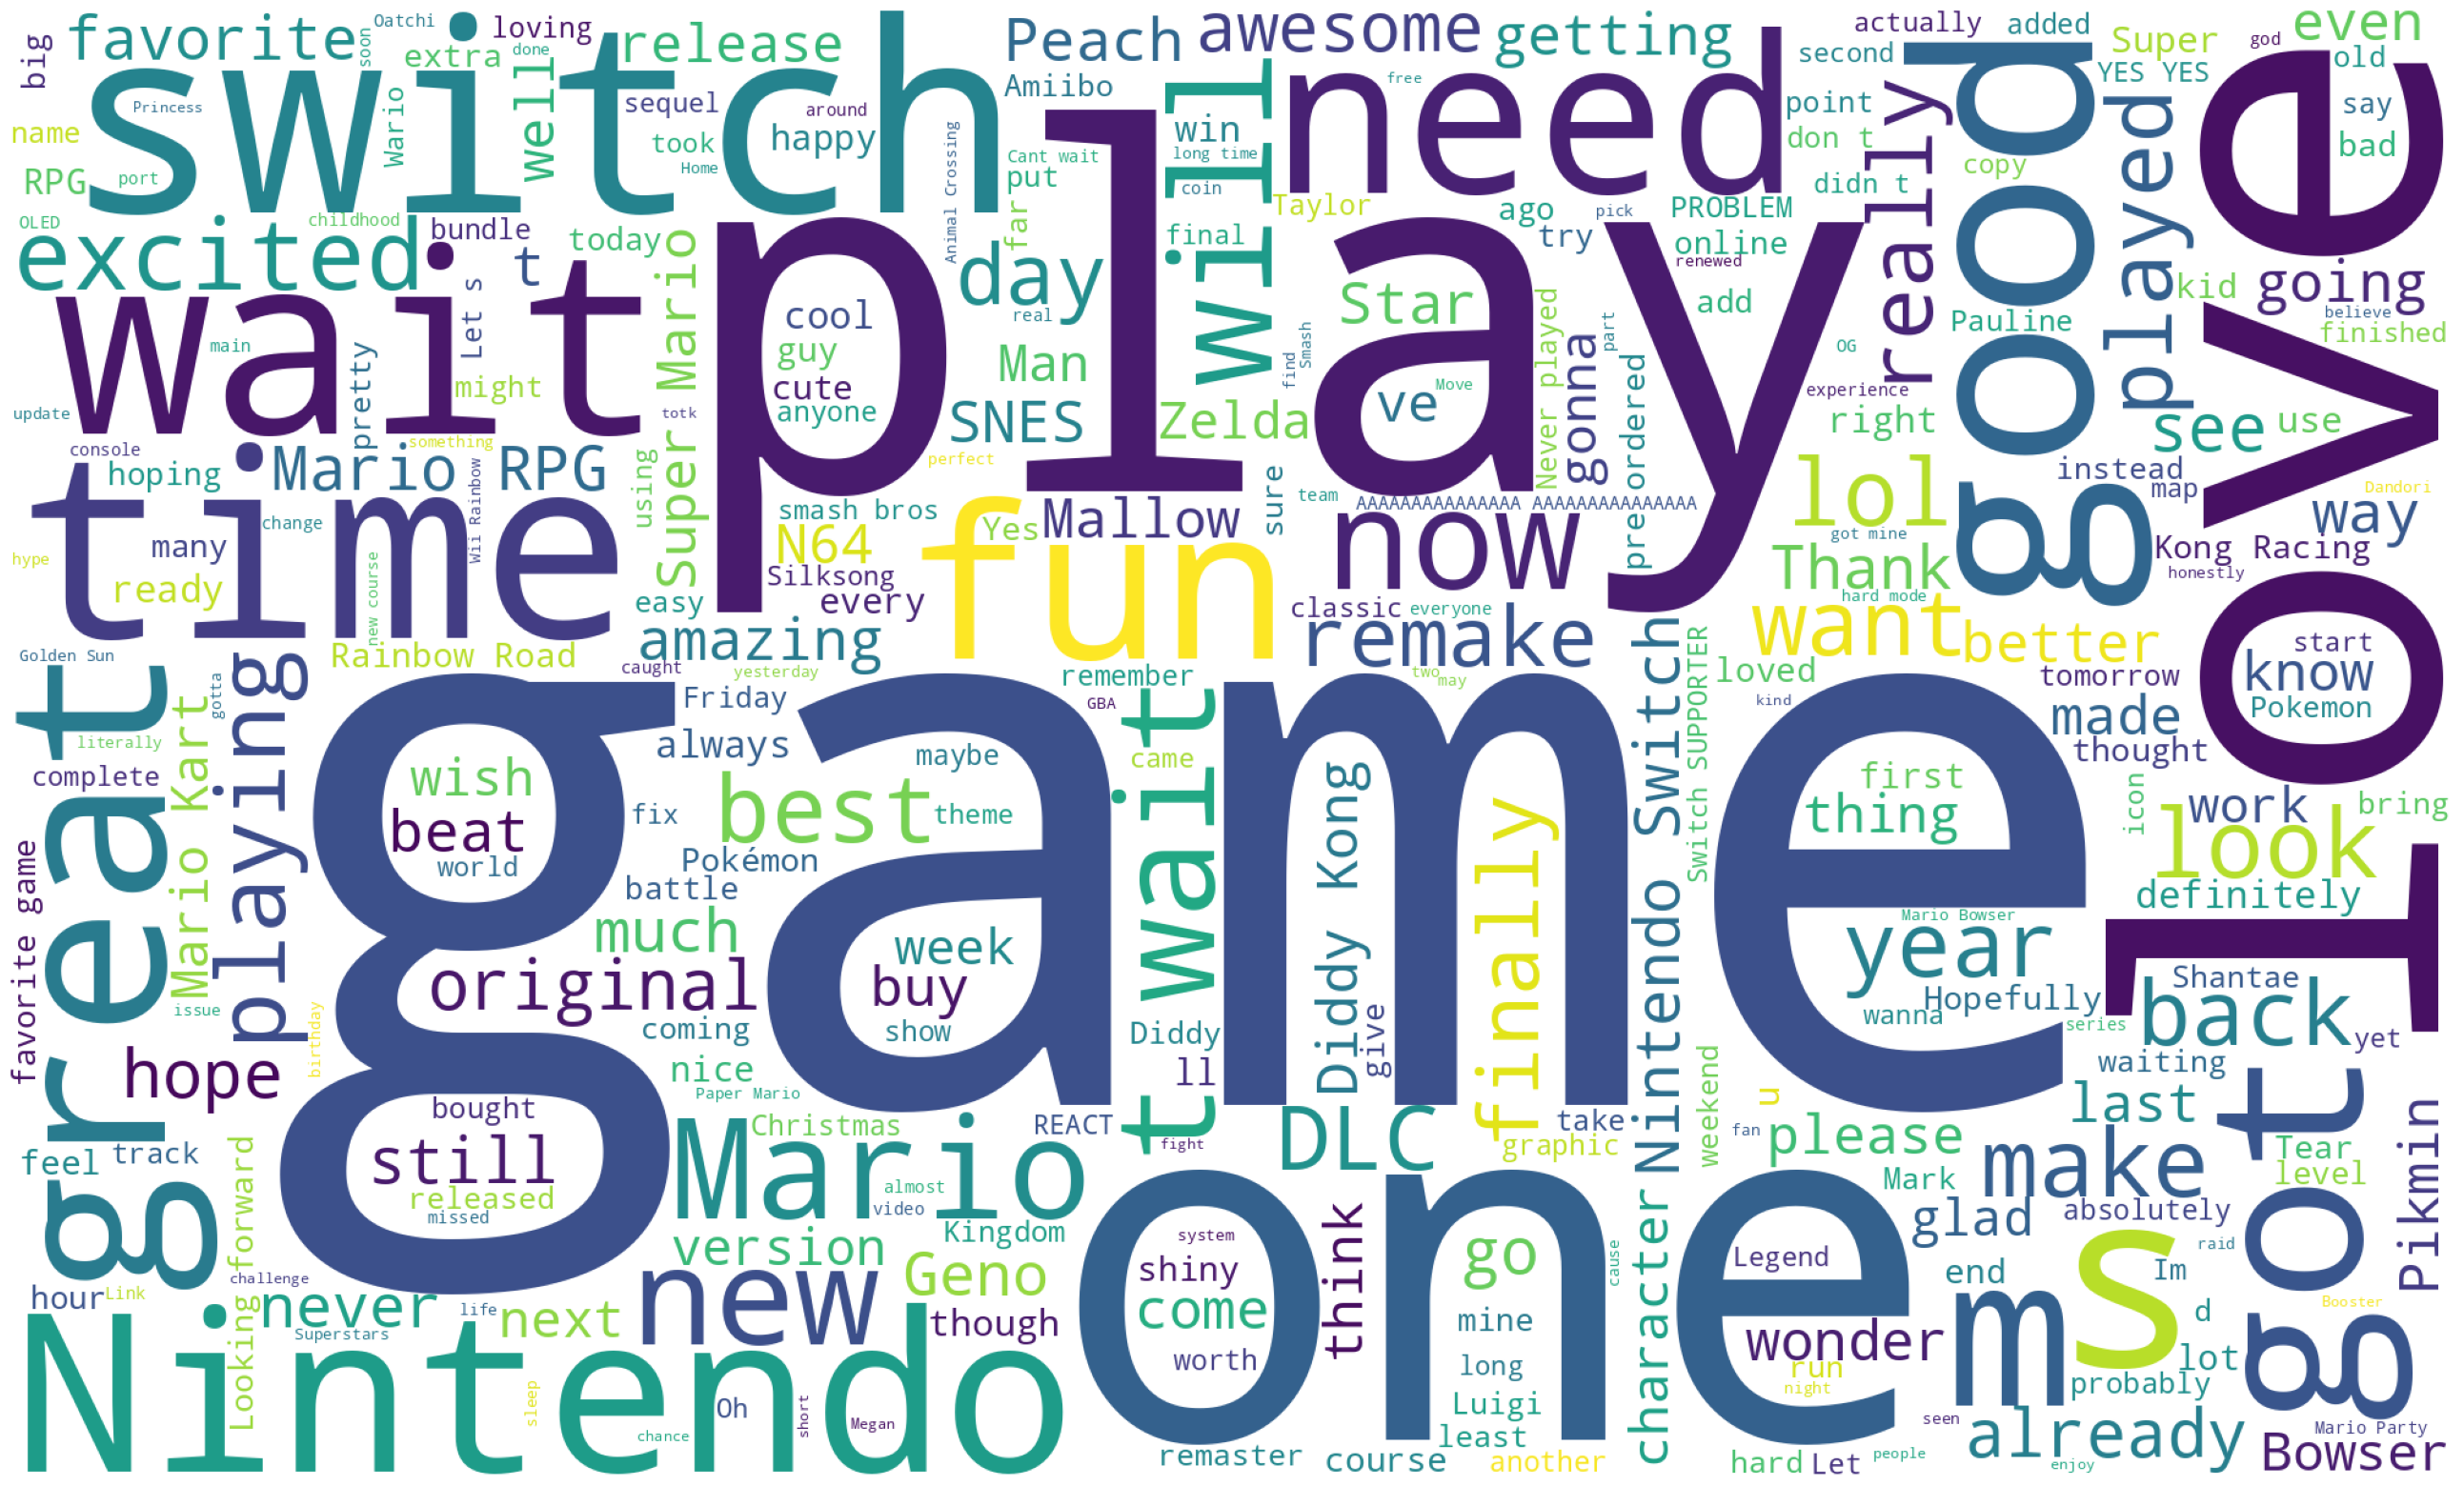

In [25]:
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()